In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('netflix_titles.csv')    # wczytanie bazy danych
df.head()     # wyświetlenie 5 pierwszych wierszy bazy danych

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()           # wyświetlenie informacji ile jest wierszy i kolumn
                    # wyszczególnienie podstawowych informacji o bazie – nazwy kolumn + ilość wierszy z danymi (not-null) + typ danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.columns = df.columns.str.capitalize()     # zamiana nazw kolumn na rozpoczynające się wielką literą

In [5]:
df.head(50)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
df.duplicated().sum() # sprawdzenie czy w bazie danych pojawiają się duplikaty

0

In [7]:
df.isnull().sum()    # sprawdzenie czy w bazie danych znajdują się puste komórki

Show_id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_added        10
Release_year       0
Rating             4
Duration           3
Listed_in          0
Description        0
dtype: int64

In [9]:
# df = df.drop(columns=['Description']) # usunięcie kolumn, które nie wnoszą informacji o filmach i serialach
# df = df.drop(columns=['Listed_in'])       # ????

df = df.drop(columns=['Show_id'])  

In [10]:
df

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
df['Date_added'] = pd.to_datetime(df['Date_added'])  # zmiana nazw miesięcy na wartości liczbowe

In [12]:
df['Date_added'].isnull().sum()    #10
df['Duration'].isnull().sum()     # 3

3

In [13]:
df = df.dropna(subset=['Date_added']) # usunięcie wierszy z brakującymi wartościami w kolumnie ‘year_added’ oraz ‘duration’
df = df.dropna(subset=['Duration'])

In [14]:
df['Date_added'].isnull().sum()   # 0
df['Duration'].isnull().sum()     # 0

0

In [15]:
df_cleaned = df.copy()

#  dodanie nowej kolumny z rokiem dodania filmu lub serialu
df_cleaned.loc[:, 'Year_added']= df_cleaned['Date_added'].dt.year

# dodanie nowej kolumny z miesiącem dodania filmu lub serialu 
df_cleaned['Month_added'] = df_cleaned['Date_added'].dt.month

In [16]:
df_cleaned.head(50)

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,Year_added,Month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [17]:
df_cleaned.to_csv('clean_data.csv', index=False)

# ZADANIE 2 od 7.03

In [18]:
df_cleaned['Type'].value_counts()

Movie      6128
TV Show    2666
Name: Type, dtype: int64

Text(0, 0.5, 'Ilości filmów i seriali')

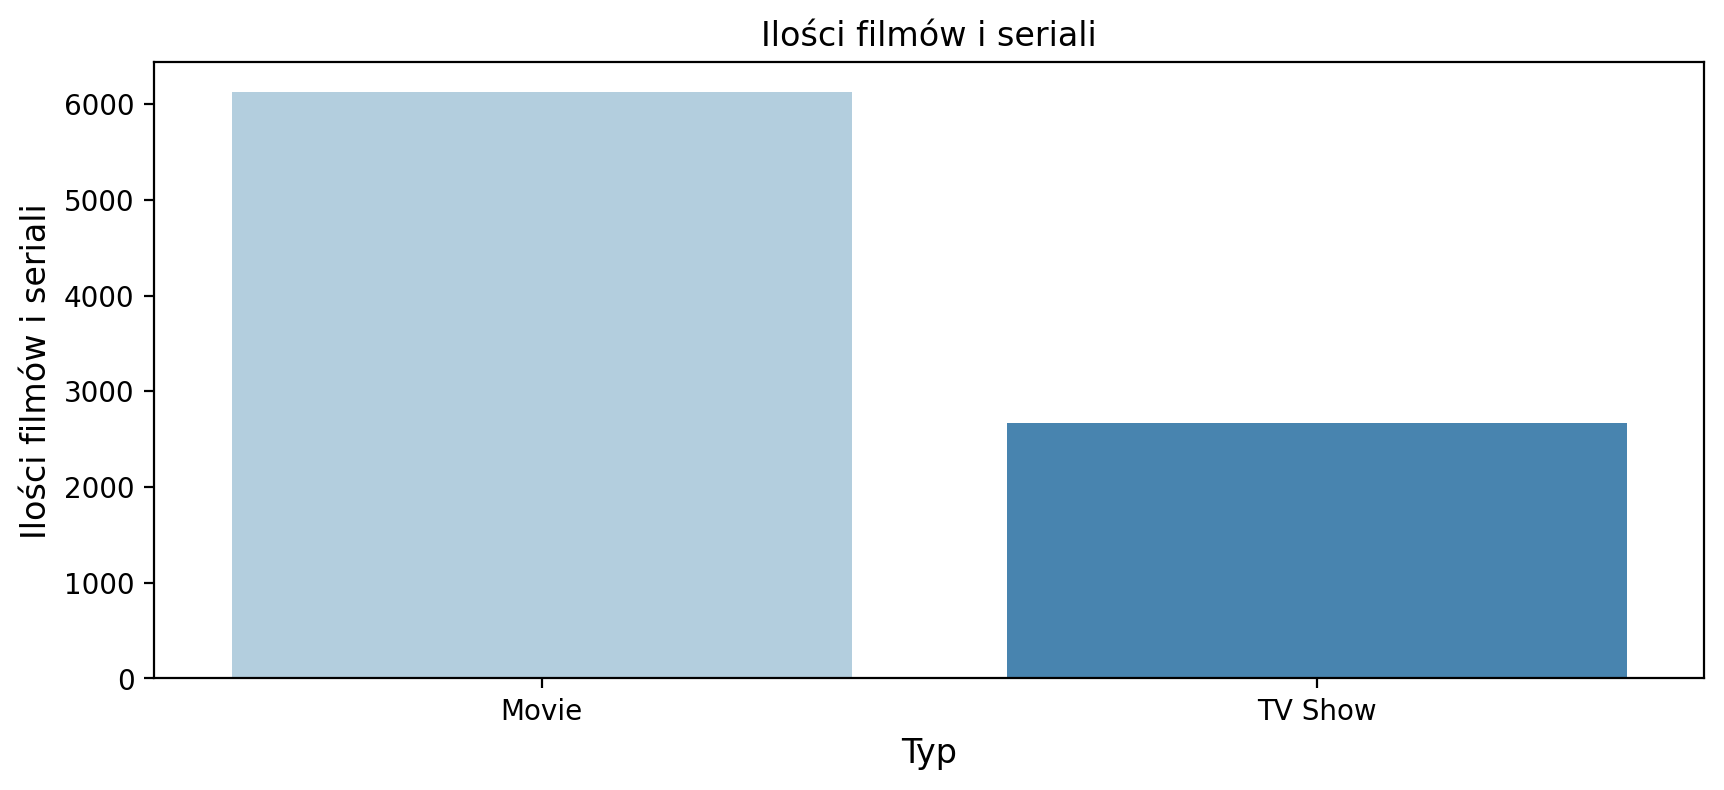

In [96]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Type', data=df_cleaned,
             palette= 'Blues')

plt.title("Ilości filmów i seriali", fontsize=12)
plt.xlabel("Typ", fontsize=12)
plt.ylabel("Ilości filmów i seriali", fontsize=12)

Text(0, 0.5, 'Ilość filmów i seriali')

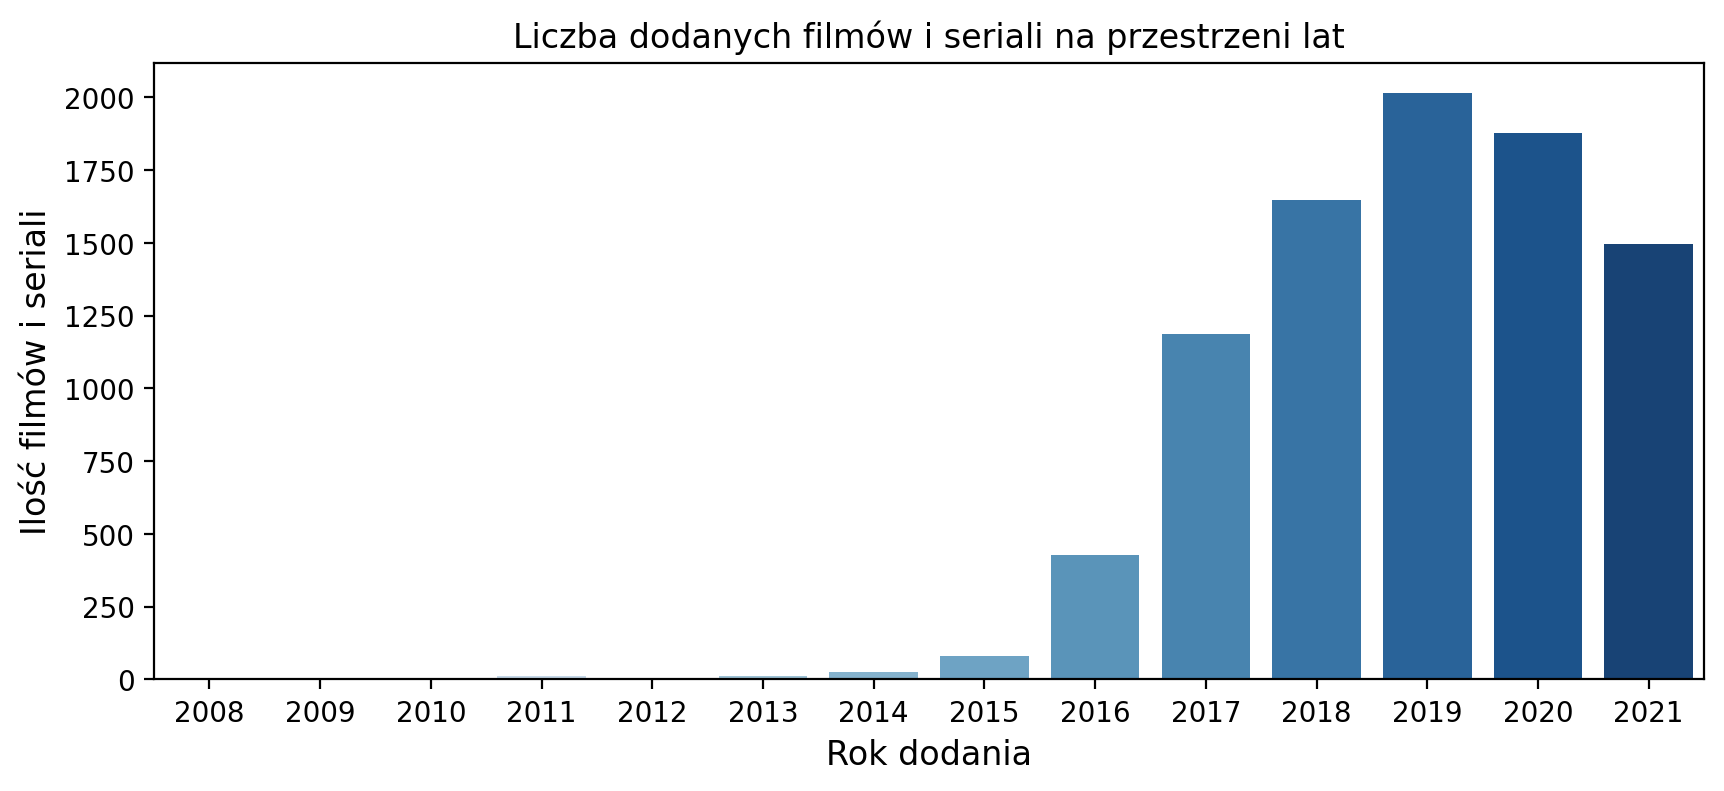

In [97]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Year_added', data=df_cleaned,
             palette= 'Blues')

plt.title("Liczba dodanych filmów i seriali na przestrzeni lat", fontsize=12)
plt.xlabel("Rok dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

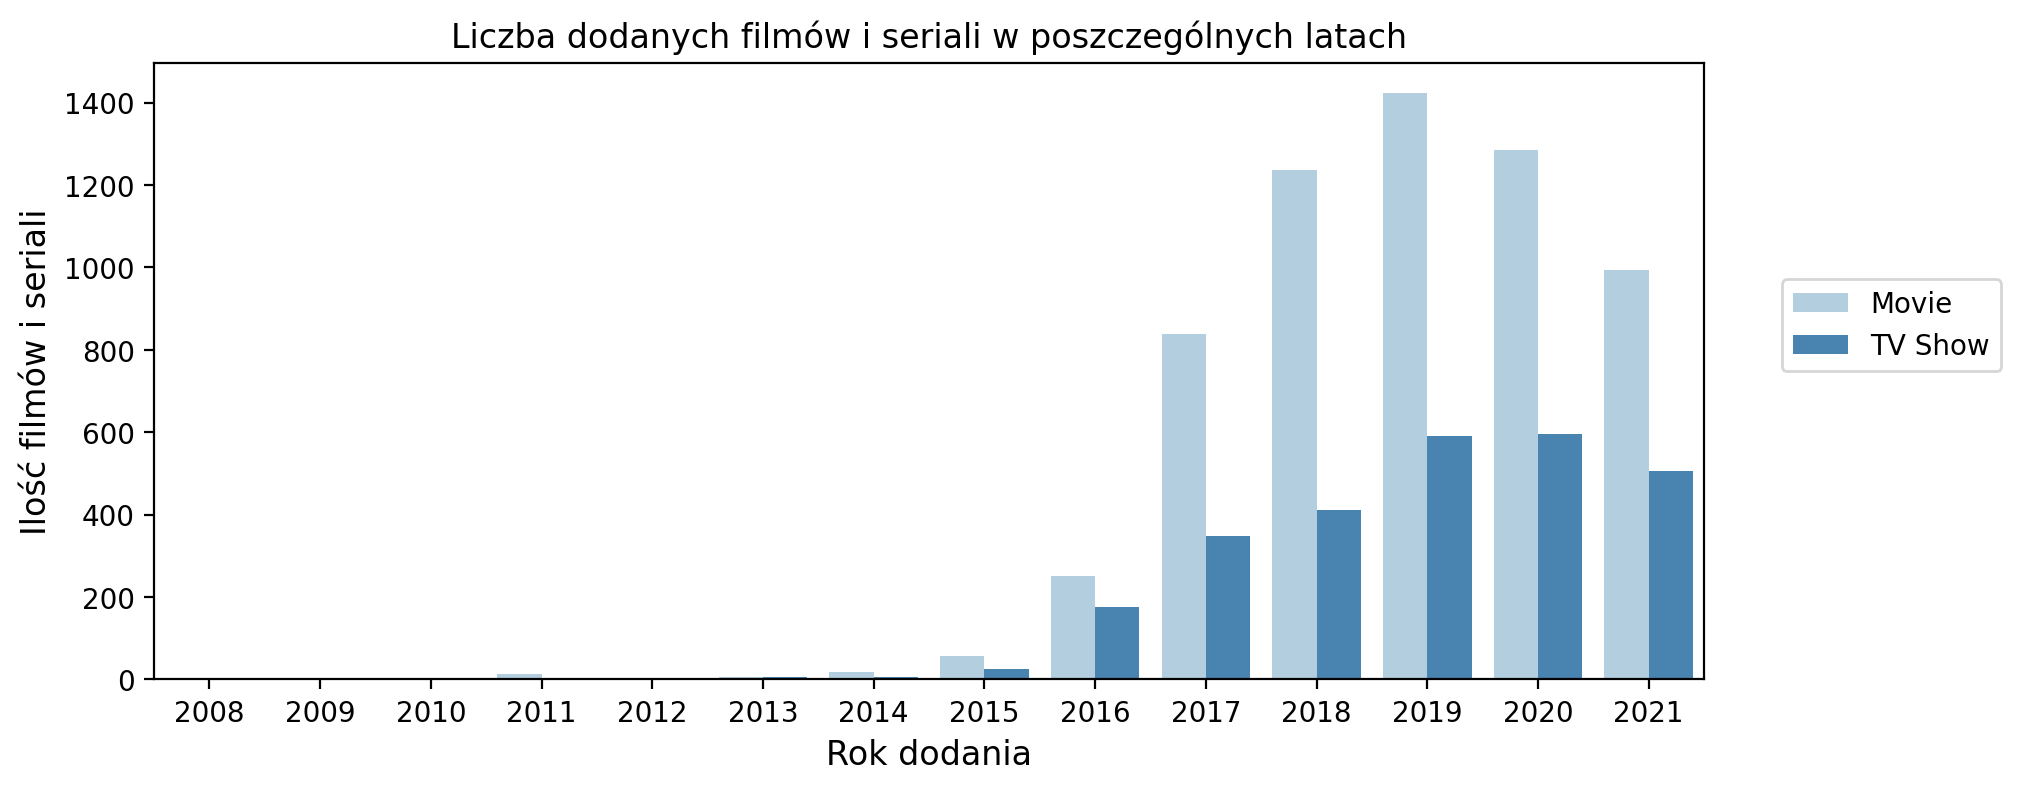

In [92]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Year_added', data=df_cleaned,
             hue='Type',
             palette= 'Blues')

plt.title("Liczba dodanych filmów i seriali w poszczególnych latach", fontsize=12)
plt.xlabel("Rok dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

plt.legend(loc=(1.05, 0.5))

In [36]:
# plt.figure(figsize=(10,6), dpi=200)
# sns.countplot(x='Type', data=df_cleaned,
#              hue='Year_added')

Text(0, 0.5, 'Ilość filmów i seriali')

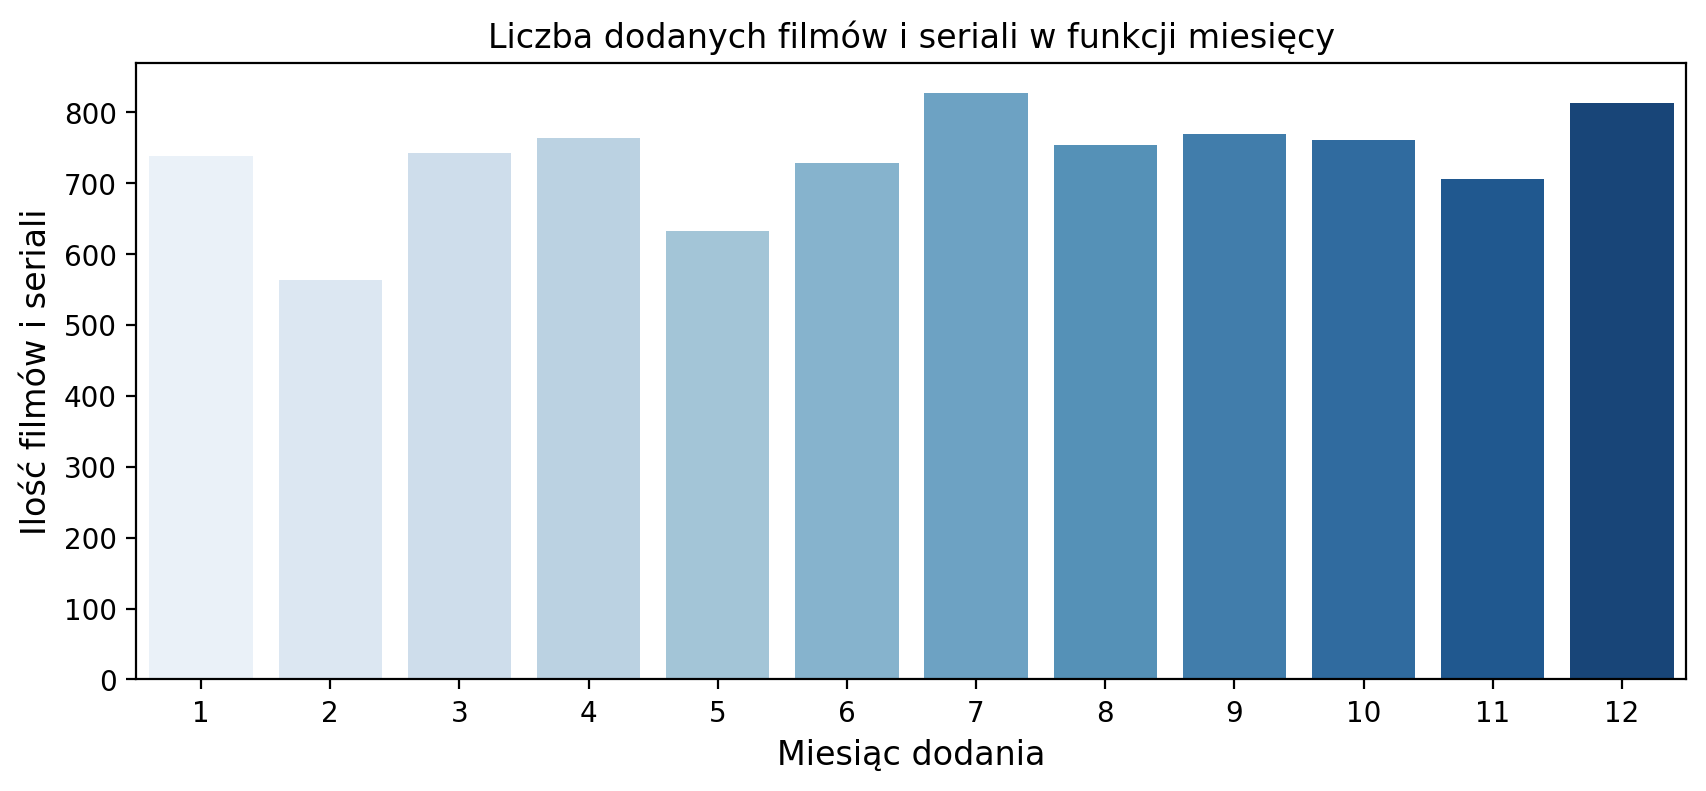

In [93]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Month_added', data=df_cleaned,
             palette= 'Blues')

plt.title("Liczba dodanych filmów i seriali w funkcji miesięcy", fontsize=12)
plt.xlabel("Miesiąc dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

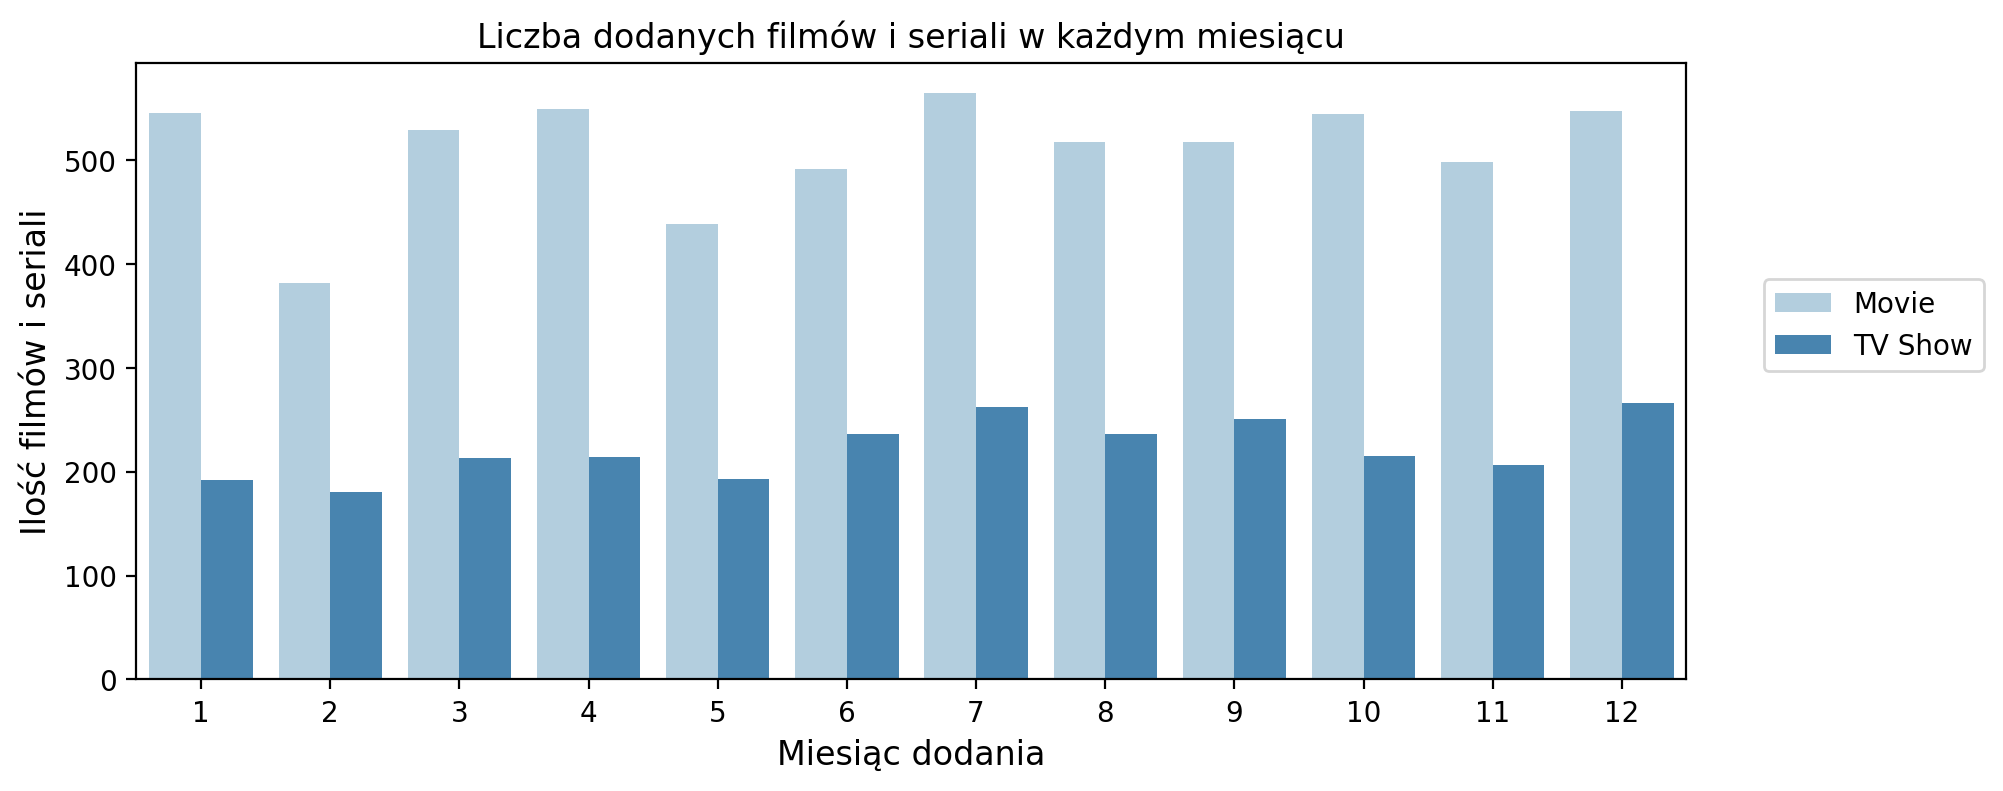

In [94]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Month_added', data=df_cleaned,
             hue='Type',
             palette= 'Blues')

plt.title("Liczba dodanych filmów i seriali w każdym miesiącu", fontsize=12)
plt.xlabel("Miesiąc dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

plt.legend(loc=(1.05, 0.5))